



### Popularity based recommendation syetem 


In [26]:
import numpy as np
import pandas as pd


In [27]:
movies_name=pd.read_csv('E:/Full Stack Data Scientist Bootcamp/Recommandation System/movies.csv')
movies_name

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9120,162672,Mohenjo Daro (2016),Adventure|Drama|Romance
9121,163056,Shin Godzilla (2016),Action|Adventure|Fantasy|Sci-Fi
9122,163949,The Beatles: Eight Days a Week - The Touring Y...,Documentary
9123,164977,The Gay Desperado (1936),Comedy


In [28]:
movies_rating=pd.read_csv('E:/Full Stack Data Scientist Bootcamp/Recommandation System/ratings.csv')
movies_rating 

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


In [29]:
movies_data=pd.merge(movies_rating,movies_name,on='movieId')

In [30]:
movies_data

,userId,movieId,rating,timestamp,title,genres
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama
1,7,31,3.0,851868750,Dangerous Minds (1995),Drama
2,31,31,4.0,1273541953,Dangerous Minds (1995),Drama
3,32,31,4.0,834828440,Dangerous Minds (1995),Drama
4,36,31,3.0,847057202,Dangerous Minds (1995),Drama
...,...,...,...,...,...,...
99999,664,64997,2.5,1343761859,War of the Worlds (2005),Action|Sci-Fi
100000,664,72380,3.5,1344435977,"Box, The (2009)",Drama|Horror|Mystery|Sci-Fi|Thriller
100001,665,129,3.0,995232528,Pie in the Sky (1996),Comedy|Romance
100002,665,4736,1.0,1010197684,Summer Catch (2001),Comedy|Drama|Romance


In [31]:
len(movies_data.groupby('title'))

9064

In [7]:
movies_data.groupby('title')['rating'].mean().head(50)


title
"Great Performances" Cats (1998)                          1.750000
$9.99 (2008)                                              3.833333
'Hellboy': The Seeds of Creation (2004)                   2.000000
'Neath the Arizona Skies (1934)                           0.500000
'Round Midnight (1986)                                    2.250000
'Salem's Lot (2004)                                       3.500000
'Til There Was You (1997)                                 2.625000
'burbs, The (1989)                                        3.052632
'night Mother (1986)                                      5.000000
(500) Days of Summer (2009)                               3.755556
*batteries not included (1987)                            3.142857
...And God Spoke (1993)                                   1.000000
...And Justice for All (1979)                             3.692308
1-900 (06) (1994)                                         4.000000
10 (1979)                                               

In [8]:
movies_data.groupby('title')['rating'].mean().sort_values(ascending=False)

title
Ivan Vasilievich: Back to the Future (Ivan Vasilievich menyaet professiyu) (1973)    5.0
Alien Escape (1995)                                                                  5.0
Boiling Point (1993)                                                                 5.0
Bone Tomahawk (2015)                                                                 5.0
Borgman (2013)                                                                       5.0
                                                                                    ... 
Waterloo Bridge (1940)                                                               0.5
Karla (2006)                                                                         0.5
Ring of Terror (1962)                                                                0.5
Road Games (a.k.a. Roadgames) (1981)                                                 0.5
Beastmaster 2: Through the Portal of Time (1991)                                     0.5
Name: rating, L

In [14]:
movies_data.groupby('title')['rating'].count().sort_values(ascending=False).head(60) 

title
Forrest Gump (1994)                                                               341
Pulp Fiction (1994)                                                               324
Shawshank Redemption, The (1994)                                                  311
Silence of the Lambs, The (1991)                                                  304
Star Wars: Episode IV - A New Hope (1977)                                         291
Jurassic Park (1993)                                                              274
Matrix, The (1999)                                                                259
Toy Story (1995)                                                                  247
Schindler's List (1993)                                                           244
Terminator 2: Judgment Day (1991)                                                 237
Star Wars: Episode V - The Empire Strikes Back (1980)                             234
Braveheart (1995)                               

In [16]:
movies_data[['title','rating']]

,title,rating
0,Dangerous Minds (1995),2.5
1,Dangerous Minds (1995),3.0
2,Dangerous Minds (1995),4.0
3,Dangerous Minds (1995),4.0
4,Dangerous Minds (1995),3.0
...,...,...
99999,War of the Worlds (2005),2.5
100000,"Box, The (2009)",3.5
100001,Pie in the Sky (1996),3.0
100002,Summer Catch (2001),1.0


In [17]:
ratings_mean_count = pd.DataFrame(movies_data.groupby('title')['rating'].mean()) 
ratings_mean_count

,rating
title,
"""Great Performances"" Cats (1998)",1.750000
$9.99 (2008),3.833333
'Hellboy': The Seeds of Creation (2004),2.000000
'Neath the Arizona Skies (1934),0.500000
'Round Midnight (1986),2.250000
...,...
xXx (2002),2.478261
xXx: State of the Union (2005),1.000000
¡Three Amigos! (1986),3.258065


In [19]:
ratings_mean_count['rating_counts'] = pd.DataFrame(movies_data.groupby('title')['rating'].count())  
ratings_mean_count

,rating,rating_counts
title,,
"""Great Performances"" Cats (1998)",1.750000,2
$9.99 (2008),3.833333,3
'Hellboy': The Seeds of Creation (2004),2.000000,1
'Neath the Arizona Skies (1934),0.500000,1
'Round Midnight (1986),2.250000,2
...,...,...
xXx (2002),2.478261,23
xXx: State of the Union (2005),1.000000,1
¡Three Amigos! (1986),3.258065,31


In [20]:
ratings_mean_count['rating'] = round(ratings_mean_count['rating'],1)

In [21]:
ratings_mean_count

,rating,rating_counts
title,,
"""Great Performances"" Cats (1998)",1.8,2
$9.99 (2008),3.8,3
'Hellboy': The Seeds of Creation (2004),2.0,1
'Neath the Arizona Skies (1934),0.5,1
'Round Midnight (1986),2.2,2
...,...,...
xXx (2002),2.5,23
xXx: State of the Union (2005),1.0,1
¡Three Amigos! (1986),3.3,31


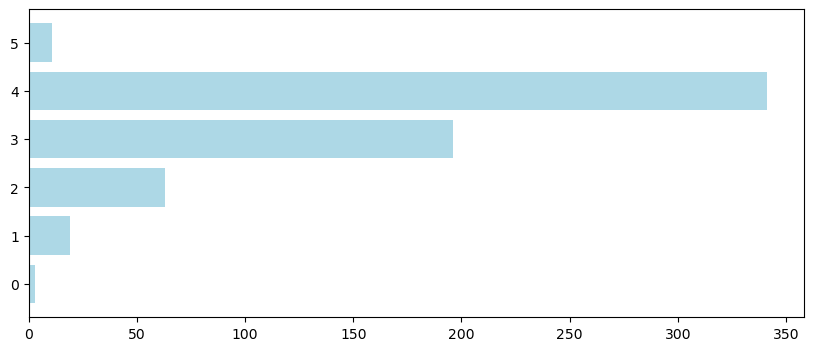

In [22]:
#plot rounded-up ratings with number of movies
import matplotlib.pyplot as plt

plt.figure(figsize =(10, 4))
ax=plt.barh(ratings_mean_count['rating'].round(),ratings_mean_count['rating_counts'],color='lightblue')
plt.show()

In [23]:
ratings_mean_count_recommended = ratings_mean_count[(ratings_mean_count['rating'] > 3) & (ratings_mean_count['rating_counts'] > 100)]
ratings_mean_count_recommended

,rating,rating_counts
title,,
2001: A Space Odyssey (1968),3.9,123
Airplane! (1980),3.8,106
Aladdin (1992),3.7,215
Alien (1979),4.0,127
Aliens (1986),3.9,125
...,...,...
While You Were Sleeping (1995),3.4,101
Who Framed Roger Rabbit? (1988),3.7,108
Willy Wonka & the Chocolate Factory (1971),3.8,148


In [25]:
ratings_mean_count_recommended = ratings_mean_count_recommended.sort_values(by='rating',ascending=False).head(10)
ratings_mean_count_recommended

,rating,rating_counts
title,,
"Godfather, The (1972)",4.5,200
"Shawshank Redemption, The (1994)",4.5,311
"Usual Suspects, The (1995)",4.4,201
"Godfather: Part II, The (1974)",4.4,135
Pulp Fiction (1994),4.3,324
Fargo (1996),4.3,224
One Flew Over the Cuckoo's Nest (1975),4.3,144
Schindler's List (1993),4.3,244
Taxi Driver (1976),4.2,118
